<a href="https://colab.research.google.com/github/yoonheekim1115/coding_study_ewha/blob/main/01_%EA%B7%B8%EB%A6%AC%EB%94%94_%EC%8A%B9%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 그리디

## 1) 개념정리 및 예제

- 현재 상황에서 지금 당장 좋은 것만 고르는 방법
- 특정한 문제를 만났을 때 단순히 현재 상황에서 가장 좋아 보이는 것만을 선택해도 문제를 풀 수 있는지 파악해야함
- 문제에서 자연스럽게 '가장 큰 순서대로', '가장 작은 순서대로' 등의 기준을 제시해주므로, 자주 정렬 알고리즘과 짝을 이뤄 출제됨

In [1]:
# 예제 3-1 거스름돈

coins = [500, 100, 50, 10]
count = 0
n = 1260

for coin in coins:
  count += n//coin #
  n%= coin # 나누고 난 뒤 나머지를 할당함

print(count)

6


* 할당 연산자 정리 (출처: https://corytips.tistory.com/162)

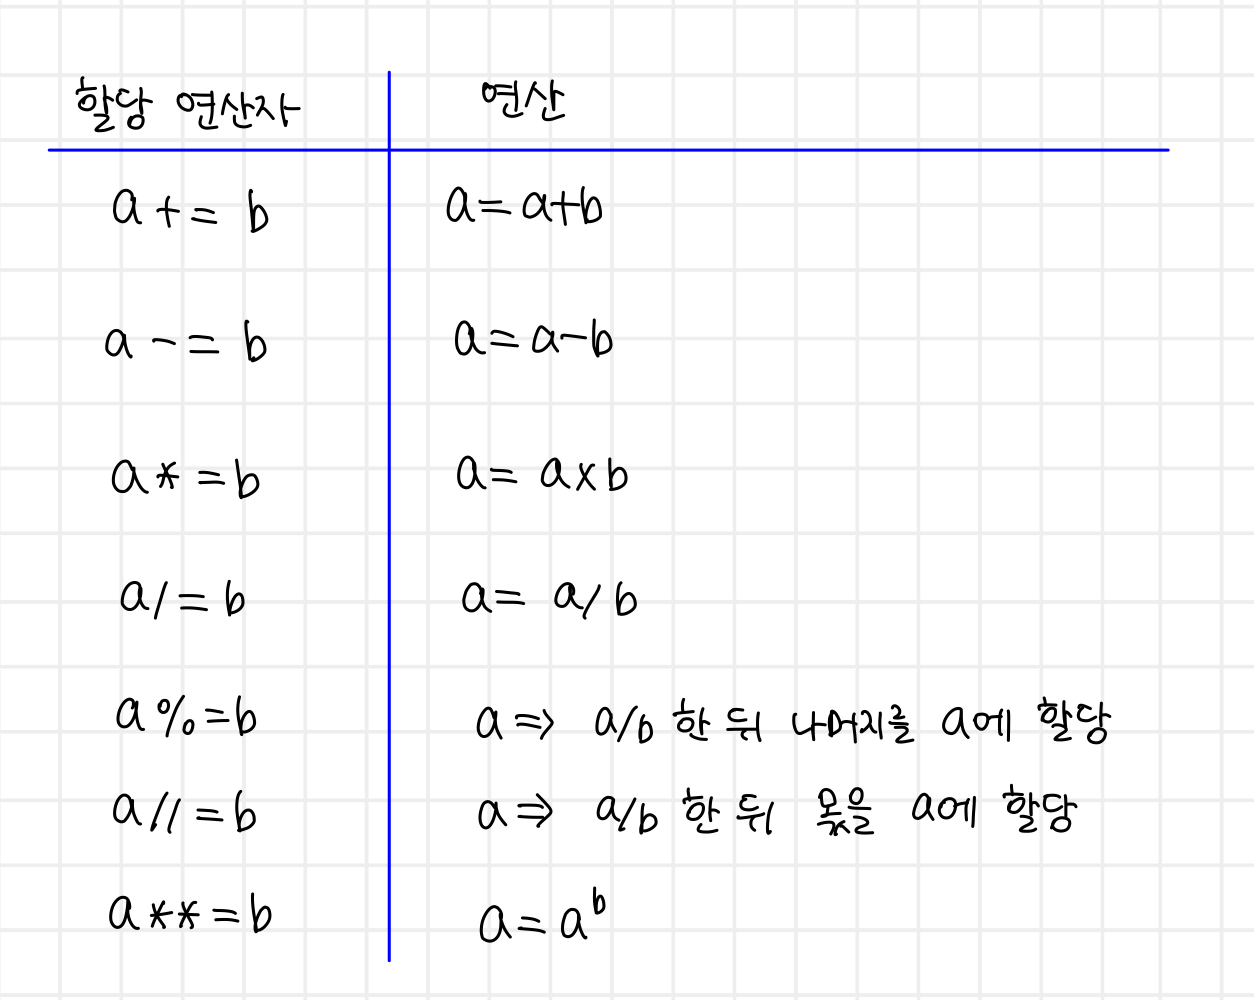

In [2]:
# 실전문제 - 큰 수의 법칙 - 내 풀이 - 틀렸음!

input1 = [5,8,3]
data = [2,4,5,4,6]

data.sort()

first = data[input1[0]-1]
second = data[input1[0]-2]

answer = first * input1[2] * int(input1[1]//input1[2]) + second * int(input1[1]%input1[2])
print(answer)


46


In [3]:
# 큰 수의 법칙 - 책 풀이

input1 = [5,8,3]
m = input1[1]; k = input1[2] 
data = [2,4,5,4,6]

data.sort()
first = data[input1[0]-1]
second = data[input1[0]-2]

count = int(m/(k+1))*k
count += m%(k+1)

result = 0
result += count*first
result += (m-count)*second

print(result)


46


In [4]:
# 실전문제 - 숫자 카드 게임 - 내 풀이

n, m = map(int, input().split())

result = 0
for i in range(n):
  data = list(map(int, input().split()))
  min_val = min(data)
  result = max(result, min_val)

print(result)

2 4
7 3 1 8
3 3 3 4
3


In [5]:
# 실전문제 - 1이 될 때까지 - 내 풀이+책 풀이
# while은 여전히 어렵다,,

inputs = [27, 4]
n = inputs[0]; k = inputs[1]
count = 0

while n>=k:
  while n%k!=0: # n이 k 배수가 아닐 때, k의 배수로 빨리 만들어줘야 계산 횟수를 줄일 수 있다. 그러니 이 조건으로 먼저 while을 돌려야 최소 숫자가 나옴.
    n-=1
    count+=1
  n//=k
  count+=1
  

while n>1:
  n-=1
  count+=1

print(count)


7


In [6]:
# 실전문제 - 1이 될 때까지 - 책 풀이 2

inputs = [27, 4]
n = inputs[0]; k = inputs[1]
count = 0

while True:
  target = (n//k)*k #k로 나누어 떨어지는 n보다 작고 가장 가까운 숫자!
  count += (n-target) #1을 빼는 횟수
  n = target
  if n<k:
    break # if 조건을 만족하면 while을 빠져나오기.
  n //= k
  count += 1

count += (n-1)

print(count)

7


## 2) 기출문제 풀이

- 생각한 걸 적어봐
1. 주어진 사람들의 모험도가 전체 사람 수보다 작으면 모험을 떠날 수 없다. 예를 들면, [3 3 5] 같은 경우. 3명의 모험가 모두 떠날 수 없어.. 그렇다면 그룹 수는 0
2. 그렇지 않으면, 일단 모험가들의 공포도를 정렬시켜본다. data.sort()
3. 공포도가 제일 심한 사람부터 사람들과 묶어주면 되지 않을까? (자기숫자-1)명과 무조건 같이 다녀야 한다.
4. 아니면 그룹 수를 최대한 많이 만들려면 어떻게 해야될까? 공포도가 가장 낮은 사람부터 고려해줘야 할까?
5. 그렇게 되면 그룹은 많이 만들 수 있긴 함... 공포도 높은 애들 버리면..



In [7]:
## Q 01. 모험가 길드

def group(value):
  value.sort()
  count = 0
  


In [8]:
## Q 02. 곱하기 혹은 더하기

# 내 풀이 
# 가장 큰 값을 만들어내야 하므로, 0을 1로 바꾼 다음에 모두 곱해주는게 가장 큰 숫자가 나올 것이라 생각함. - 틀림..

def summul(value): 
  answer = 1
  if value.find('0')!=-1: 
    value = value.replace('0','1')
  for i in range(len(value)):
    answer *= int(value[i])
  
  return answer

In [9]:
print(summul('02984'))
print(summul('567'))
print(summul('105018010827071150'))

576
210
156800


In [10]:
# 책 풀이 보고 다시 바꿔봄.
# 숫자가 0이거나 1인 경우는 더하기, 그 외의 숫자들일 경우에는 곱하기를 하는게 더 큰 값으로 계산할 수 있다.
# 그래서 문자열의 각 자리의 숫자가 0 혹은 1 인지를 확인하면서 계산해야함.

def summul(value):
  result = int(value[0])
  for i in range(1, len(value)):
    num = int(value[i])
    if num <= 1 or result <= 1:
      result += num
    else:
      result *= num
  
  return result

In [11]:
print(summul('02984'))
print(summul('567'))
print(summul('105018010827071150')) # 마지막 값에서 차이가 나는 것을 알 수 있다!

576
210
223450
